In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df = pd.read_csv("Data_Train.csv")

In [3]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Exploratory Data Analysis (EDA):

In [4]:
train_df.shape

(10683, 11)

In [5]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
32h 20m      1
30h 15m      1
28h 30m      1
31h 30m      1
13h 35m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
train_df.dropna(inplace=True)

In [11]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [161]:
train_df.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,1.048800e+04,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,1.048800e+04,10488.000000
mean,-4.020430e-16,1.964340,1.411232,0.805683,8858.194127,13.616895,4.730931,12.541381,24.333047,13.321510,24.691076,4.421388e-16,28.412948
std,1.000048e+00,1.172646,1.450935,0.658108,4053.689061,8.442507,1.155032,5.739938,18.723724,6.857135,16.544046,1.000048e+00,16.976469
min,-2.248286e+00,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-2.324838e+00,0.000000
25%,-3.048845e-01,2.000000,0.000000,0.000000,5224.000000,6.000000,4.000000,8.000000,5.000000,8.000000,10.000000,-1.165218e+00,15.000000
50%,1.383909e-01,2.000000,1.000000,1.000000,8266.000000,12.000000,5.000000,12.000000,25.000000,14.000000,25.000000,1.047216e-01,30.000000
75%,1.383909e-01,3.000000,2.000000,1.000000,12284.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,8.173137e-01,45.000000
max,2.382533e+00,4.000000,5.000000,2.000000,22798.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,1.881023e+00,55.000000


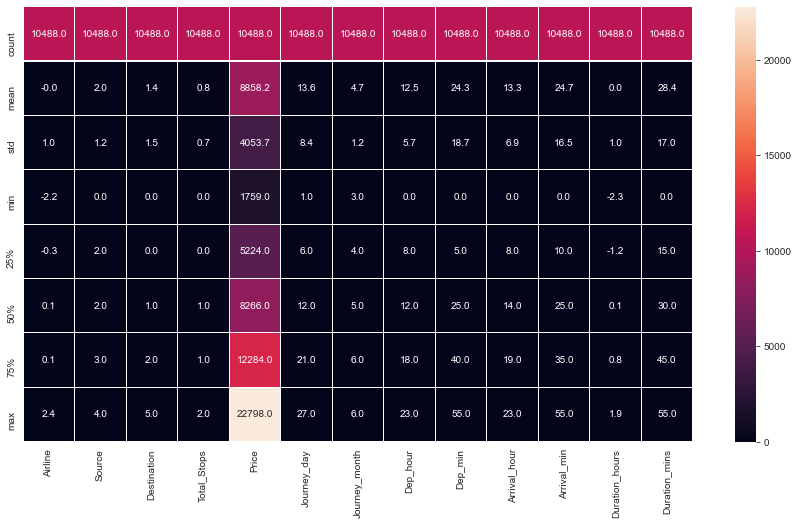

In [162]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

### Analyzing Target Variable: 

In [13]:
train_df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [14]:
train_df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

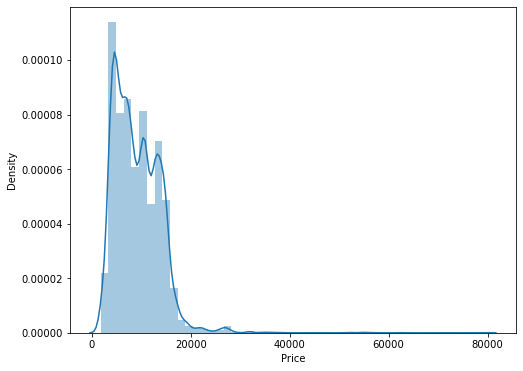

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Price'])
plt.show()

### Analayzing Feature columns:

 ##### Date_of_Journey is a object data type. therefore, we have to convert this datatype into timestamp 

In [16]:
train_df["Journey_day"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [17]:
train_df["Journey_month"] = pd.to_datetime(train_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [18]:
#now dropping 
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [19]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


##### Departure time is when a plane leaves the gate. 
##### Similar to Date_of_Journey we can extract values from Dep_Time

In [20]:
# Extracting Hours
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour

In [21]:
# Extracting Minutes
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute

In [22]:
# now dropping
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [23]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


#####  Arrival time is when a plane leaves the gate. 
##### Similar to Date_of_Journey we can extract values from Arrival_Time

In [24]:
# Extracting Hours
train_df["Arrival_hour"] = pd.to_datetime(train_df["Arrival_Time"]).dt.hour

In [25]:
# Extracting Minutes
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute

In [26]:
# now dropping
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [27]:
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [28]:
duration = list(train_df["Duration"])

In [29]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

In [30]:
#creating 
duration_hours = []
duration_mins = []

In [31]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [32]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

In [33]:
train_df.drop(["Duration"], axis = 1, inplace = True)

In [34]:
train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [35]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [36]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

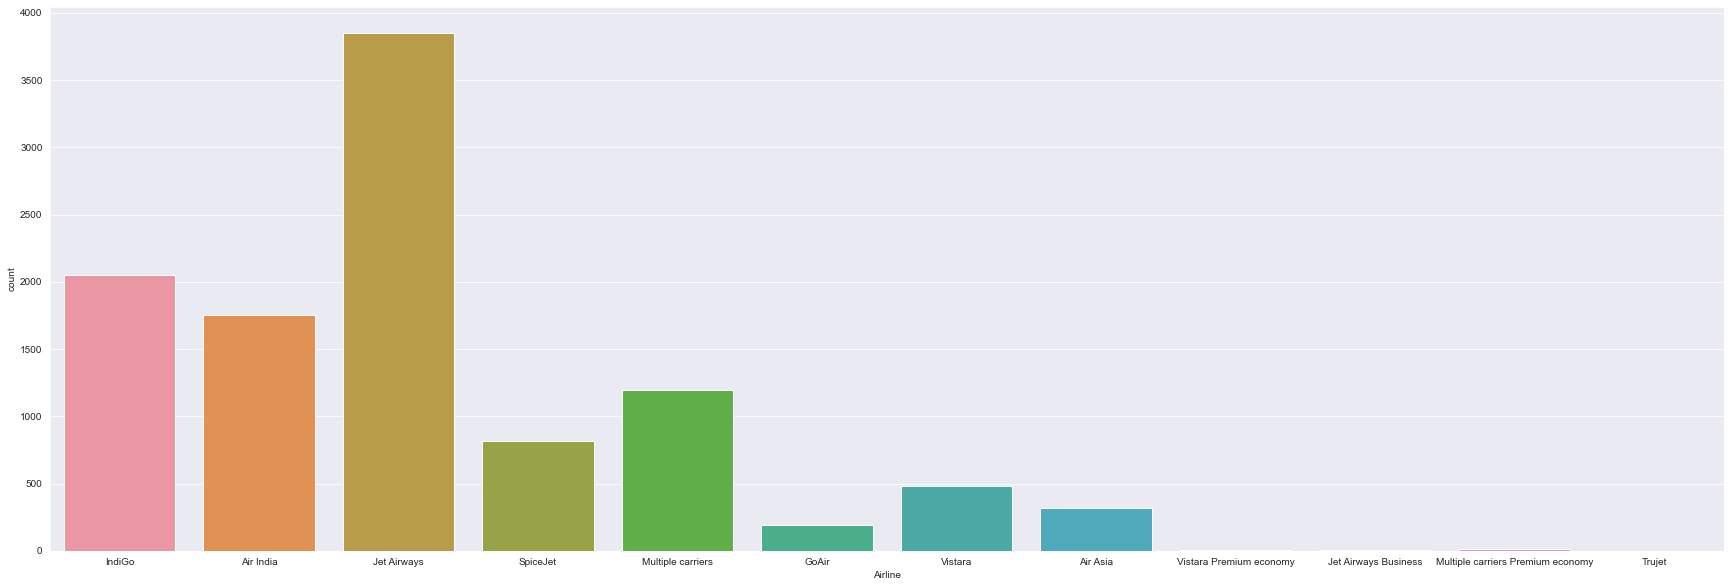

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,10))
sns.countplot(train_df['Airline'])
plt.show()

In [38]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [39]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

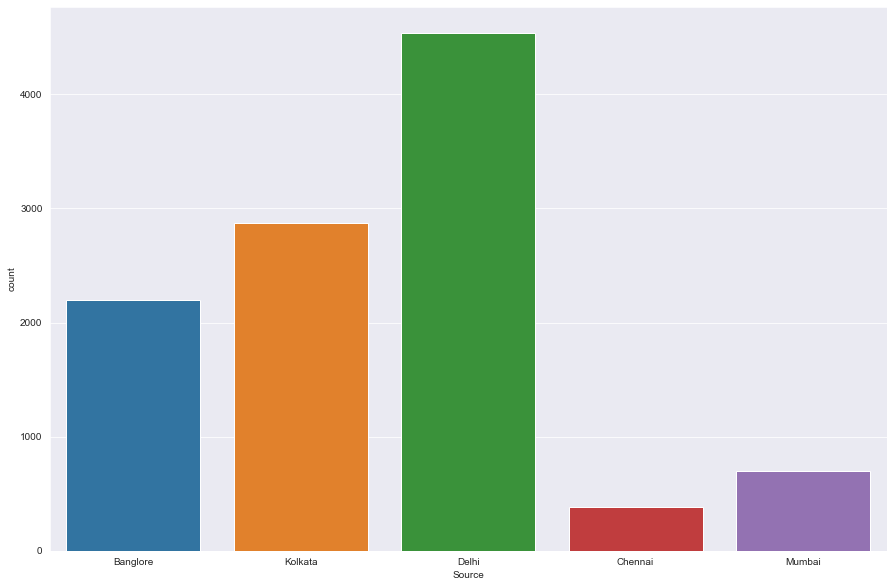

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.countplot(train_df['Source'])
plt.show()

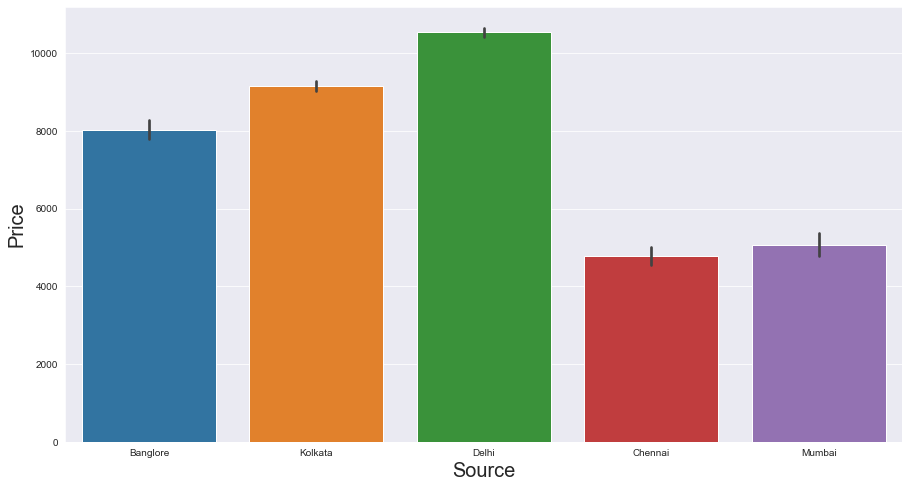

In [41]:
# Source vs Price
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.barplot(x = 'Source',y = 'Price', data = train_df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Source',fontsize=20)
plt.show()

In [42]:
train_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [43]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

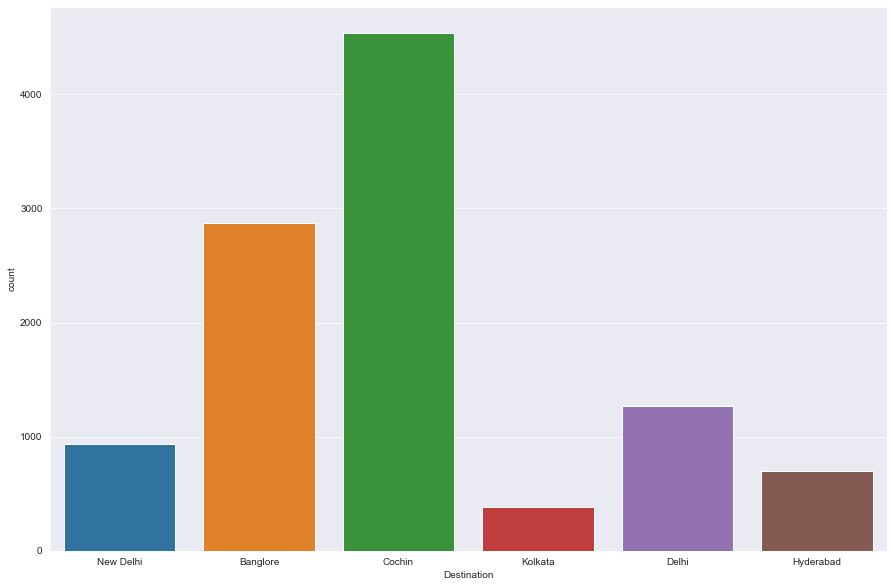

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.countplot(train_df['Destination'])
plt.show()

In [45]:
train_df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → BBI → HYD             1
CCU → VTZ → BLR             1
BOM → DED → DEL → HYD       1
BOM → CCU → HYD             1
BOM → VNS → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [46]:
train_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
#aasigning each value to Total_stops
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

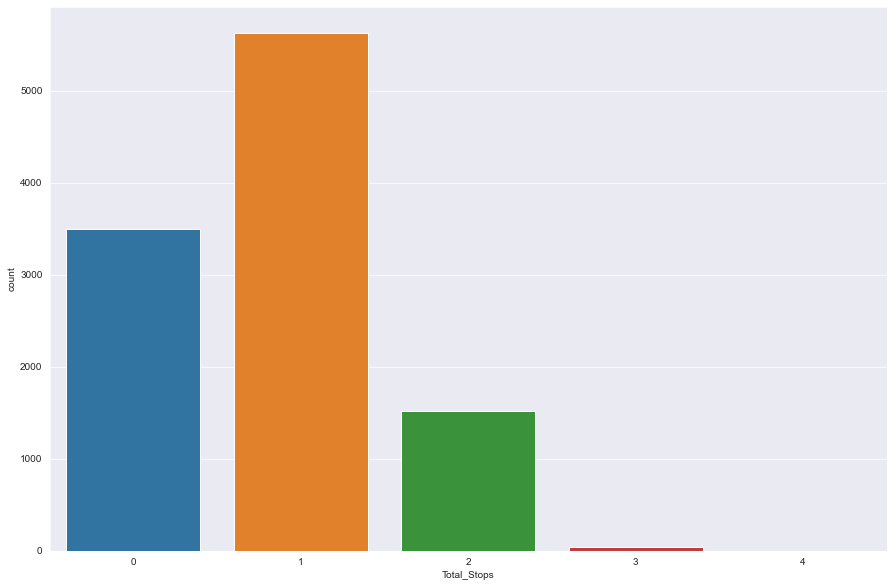

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.countplot(train_df['Total_Stops'])
plt.show()

##### Route and Total_stops are almost same ,so dropping Route

In [49]:
train_df.drop(["Route"], axis = 1, inplace = True)

##### Additional_info is having more thN 50% data n-_info,so drooping it


In [50]:
train_df.drop(["Additional_Info"], axis = 1, inplace = True)

In [51]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


# Label Encoding:

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
train_df['Airline'] = le.fit_transform(train_df['Airline'])

In [54]:
train_df['Source'] = le.fit_transform(train_df['Source'])

In [55]:
train_df['Destination'] = le.fit_transform(train_df['Destination'])

In [56]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,55,22,25,2,30
10679,1,3,0,0,4145,27,4,20,45,23,20,2,35
10680,4,0,2,0,7229,27,4,8,20,11,20,3,0
10681,10,0,5,0,12648,1,3,11,30,14,10,2,40


# Correlation:

In [158]:
train_df.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.010375,0.018028,-0.168133,0.001963,0.026336,0.027745,-0.046320,-0.071667,-0.007889,-0.096392,-0.098338,-0.047680
Source,-0.010375,1.000000,-0.583099,0.204782,0.076118,-0.012100,0.171949,0.059919,-0.050072,0.025155,0.020764,0.160005,-0.148171
Destination,0.018028,-0.583099,1.000000,-0.322049,-0.175588,-0.016026,-0.351496,-0.075465,0.119679,-0.040797,0.017310,-0.347257,0.063102
Total_Stops,-0.168133,0.204782,-0.322049,1.000000,0.670289,-0.000700,0.076351,-0.042728,-0.004483,0.029524,-0.110305,0.827344,-0.130751
Price,0.001963,0.076118,-0.175588,0.670289,1.000000,-0.115268,-0.042764,0.014407,-0.056146,0.033266,-0.100381,0.670677,-0.137114
Journey_day,0.026336,-0.012100,-0.016026,-0.000700,-0.115268,1.000000,-0.058400,0.000489,-0.003016,-0.003596,-0.017990,-0.017304,-0.009825
Journey_month,0.027745,0.171949,-0.351496,0.076351,-0.042764,-0.058400,1.000000,0.034775,-0.053141,-0.000598,-0.100610,0.053081,-0.045122
Dep_hour,-0.046320,0.059919,-0.075465,-0.042728,0.014407,0.000489,0.034775,1.000000,-0.026962,0.013285,0.068869,0.005612,-0.031612
Dep_min,-0.071667,-0.050072,0.119679,-0.004483,-0.056146,-0.003016,-0.053141,-0.026962,1.000000,0.044899,-0.017003,-0.035530,0.091797
Arrival_hour,-0.007889,0.025155,-0.040797,0.029524,0.033266,-0.003596,-0.000598,0.013285,0.044899,1.000000,-0.152937,0.060382,-0.114306


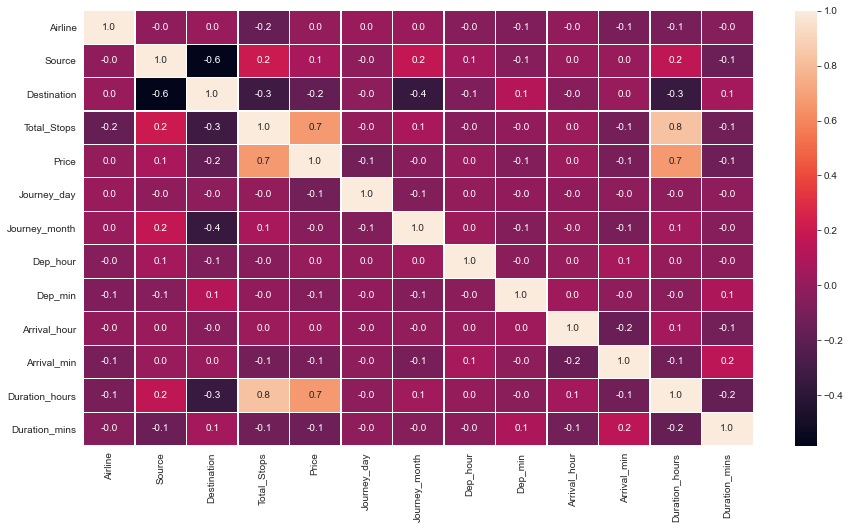

In [159]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Checking for Outliers:

In [57]:
X = train_df.drop(columns = ['Price'])
y = train_df['Price']

<AxesSubplot:xlabel='Airline'>

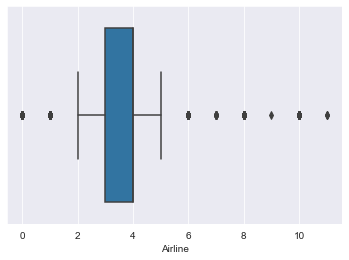

In [58]:
sns.boxplot(train_df['Airline'])

<AxesSubplot:xlabel='Source'>

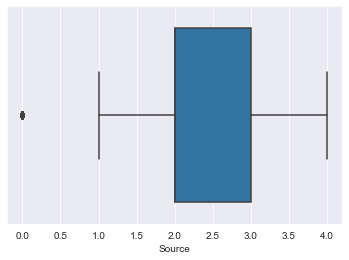

In [59]:
sns.boxplot(train_df['Source'])

<AxesSubplot:xlabel='Destination'>

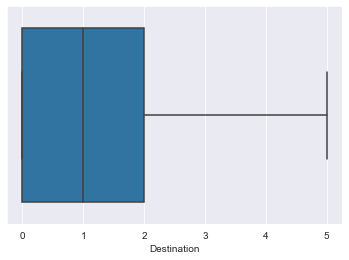

In [60]:
sns.boxplot(train_df['Destination'])

<AxesSubplot:xlabel='Total_Stops'>

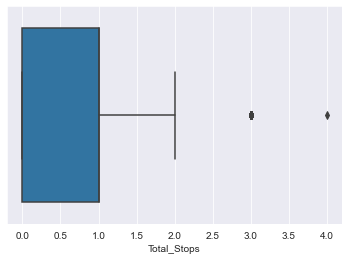

In [61]:
sns.boxplot(train_df['Total_Stops'])

<AxesSubplot:xlabel='Price'>

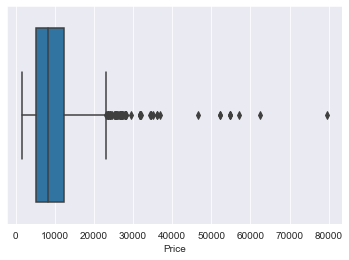

In [62]:
sns.boxplot(train_df['Price'])

In [63]:
train_df.shape

(10682, 13)

# Zscore:

In [64]:
from scipy.stats import zscore

In [65]:
Z = zscore(train_df)

In [66]:
z_abs_score = np.abs(Z)

In [67]:
#taking 3 as thresold value
df1 = train_df[(z_abs_score < 3).all(axis=1)]

In [68]:
df1.shape

(10488, 13)

In [69]:
train_df.shape

(10682, 13)

### Percenatge of Dataloss

In [70]:
data_loss = (10682-10488)/10682*100
data_loss

1.8161392997566002

### 1.86% data loss is acceptable

In [71]:
dropindx = train_df.index.difference(df1.index)

In [72]:
train_df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [73]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,55,22,25,2,30
10679,1,3,0,0,4145,27,4,20,45,23,20,2,35
10680,4,0,2,0,7229,27,4,8,20,11,20,3,0
10681,10,0,5,0,12648,1,3,11,30,14,10,2,40


# skewness:

In [74]:
train_df.skew()

Airline           0.730245
Source           -0.436551
Destination       1.262474
Total_Stops       0.229781
Price             0.415847
Journey_day       0.107486
Journey_month    -0.417433
Dep_hour          0.100324
Dep_min           0.172811
Arrival_hour     -0.362901
Arrival_min       0.106791
Duration_hours    0.765124
Duration_mins    -0.097756
dtype: float64

# Plotting Skewness

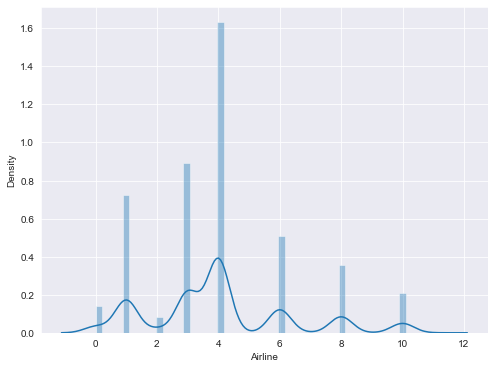

In [75]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Airline'])
plt.show()

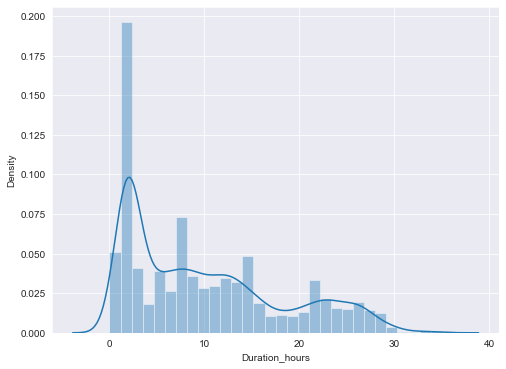

In [76]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Duration_hours'])
plt.show()

# Reducing skewness using PowerTransformer

In [77]:
from sklearn.preprocessing import PowerTransformer

In [78]:
PT = PowerTransformer(method='yeo-johnson', standardize=True)

In [79]:
df2 = train_df[['Airline','Duration_hours']]

In [80]:
TF = PT.fit_transform(df2)

In [81]:
transformed = pd.DataFrame(TF, columns=df2.columns) #to convert numpy array back into dataframe

In [82]:
transformed.skew()

Airline          -0.013733
Duration_hours   -0.030791
dtype: float64

In [83]:
transformed.index = train_df.index

In [84]:
train_df[['Airline','Duration_hours']] = transformed[['Airline','Duration_hours']]

In [85]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,-0.304884,0,5,0,3897,24,3,22,20,1,10,-1.165218,50
1,-1.427893,3,0,2,7662,1,5,5,50,13,15,-0.037018,25
2,0.138391,2,1,2,13882,9,6,9,25,4,25,1.102935,0
3,-0.304884,3,0,1,6218,12,5,18,5,23,30,-0.377463,25
4,-0.304884,0,5,1,13302,1,3,16,50,21,35,-0.589067,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-2.248286,3,0,0,4107,9,4,19,55,22,25,-1.165218,30
10679,-1.427893,3,0,0,4145,27,4,20,45,23,20,-1.165218,35
10680,0.138391,0,2,0,7229,27,4,8,20,11,20,-0.843743,0
10681,2.117605,0,5,0,12648,1,3,11,30,14,10,-1.165218,40


# Standard Scaler Method:

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
X = train_df.drop(columns = ['Price'])
y = train_df['Price']

In [88]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

# Principle Component Analysis:

In [89]:
from sklearn.decomposition import PCA
pca = PCA()

In [90]:
component = pca.fit_transform(std_X)

In [91]:
pca.fit(std_X)

PCA()

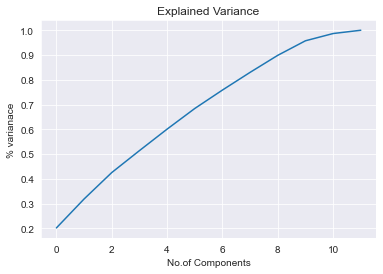

In [92]:
#visualzise
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

In [93]:
final = PCA()
final_data = final.fit_transform(std_X)
pca_X = pd.DataFrame(final_data)
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.536602,0.878620,0.612847,-0.853984,-1.342253,-0.235833,2.255204,0.068344,-0.262547,1.541090,0.499555,-0.106773
1,-1.825866,0.895501,0.671305,1.235539,1.833699,0.192225,-0.976806,0.067773,-1.049921,0.627833,-0.098890,1.167114
2,-2.055628,0.555173,-0.011349,-1.067497,0.727719,0.872339,0.335860,0.733483,-1.531762,-0.976493,0.115153,0.470020
3,-1.059661,-1.129455,-0.180234,0.809210,-1.086861,0.428481,-0.517404,-0.786468,0.782706,0.043639,0.060578,0.539548
4,2.505001,2.350565,0.674694,1.649808,-0.066785,1.133219,-0.050597,0.631794,1.097714,-0.355759,0.645774,0.595660
...,...,...,...,...,...,...,...,...,...,...,...,...
10483,0.381057,-0.596736,0.870016,3.278274,-0.763221,-0.483568,-0.866551,-0.302255,-0.587542,1.132744,-0.777211,-0.031927
10484,0.434531,-0.826768,0.199240,2.221355,-1.630004,-2.079529,-0.274812,-0.621106,-0.043098,1.040223,-0.540163,-0.031376
10485,1.717986,0.495859,-1.377200,-1.134127,-0.956827,-0.683275,-0.171648,-0.400368,-1.438610,-0.527424,-1.219185,-0.063766
10486,3.551296,1.064896,-1.546775,-0.252393,0.837938,1.296408,0.188137,1.317872,1.189402,0.525691,0.346427,0.072837


# Model Building:

In [127]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

#### Spliting Data

In [95]:
X_train,X_test,y_train,y_test = train_test_split(pca_X,y, test_size=.31, random_state=64)

### Ridge

In [96]:
R = Ridge()
R.fit(X_train,y_train)

Ridge()

In [97]:
R.score(X_train,y_train)

0.5346158122289377

In [98]:
pred_r = R.predict(X_test)

In [99]:
print('R2_SCORE:',r2_score(y_test,pred_r))

R2_SCORE: 0.5268125118992055


In [100]:
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_r))

Mean_Squared_Error: 7832218.575071664


In [101]:
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_r)))

Root Mean_Squared_Error: 2798.6101148733924


### DecisionTreeRegressor

In [102]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [103]:
DTR.score(X_train,y_train)

0.9647308489962796

In [104]:
pred_dtr = DTR.predict(X_test)

In [105]:
print('R2_SCORE:',r2_score(y_test,pred_dtr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_SCORE: 0.5556312453068146
Mean_Squared_Error: 7355209.725976664
Root Mean_Squared_Error: 2712.0489903349207


### RandomForestRegressor

In [106]:
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [107]:
RFR.score(X_train,y_train)

0.9395526269447769

In [108]:
pred_rfr = RFR.predict(X_test)

In [109]:
print('R2_SCORE:',r2_score(y_test,pred_rfr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_SCORE: 0.7517041165710152
Mean_Squared_Error: 4109803.5751361144
Root Mean_Squared_Error: 2027.2650480724305


### XGBRegressor

In [110]:
XGR = XGBRegressor()
XGR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [111]:
XGR.score(X_train,y_train)

0.9209294994367199

In [112]:
pred_xgr = XGR.predict(X_test)

In [113]:
print('R2_SCORE:',r2_score(y_test,pred_xgr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_xgr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_xgr)))

R2_SCORE: 0.7474584539683053
Mean_Squared_Error: 4180077.9554539407
Root Mean_Squared_Error: 2044.52389456664


### SVR

In [114]:
S = SVR()
S.fit(X_train,y_train)

SVR()

In [115]:
S.score(X_train,y_train)

0.05746340427982577

In [116]:
pred_s = S.predict(X_test)

In [117]:
print('R2_SCORE:',r2_score(y_test,pred_s))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_s))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_s)))

R2_SCORE: 0.05789405827137806
Mean_Squared_Error: 15593775.917677116
Root Mean_Squared_Error: 3948.8955313704


# Cross Validation:

In [118]:
#Ridge
print(cross_val_score(R,pca_X,y,cv=5).mean())

0.5306319570609899


In [119]:
#RandomRegressor
print(cross_val_score(RFR,pca_X,y,cv=5).mean())

0.7428671762406516


In [120]:
#DecisionTree
print(cross_val_score(DTR,pca_X,y,cv=5).mean())

0.5436962793601872


In [121]:
#XGBRegressor
print(cross_val_score(XGR,pca_X,y,cv=5).mean())

0.7391410652324284


In [122]:
#SVR
print(cross_val_score(S,pca_X,y,cv=5).mean())

0.06636927495812998


# Based on r2 score and cross val score, RandomforestRegressor is Best Model

# Hyper Parameter Tuning :

In [124]:
params = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],'max_features':  ['auto', 'sqrt'], 'max_depth':  [int(x) for x in np.linspace(5, 30, num = 6)],'min_samples_split':[2, 5, 10, 15, 100],'min_samples_leaf': [1, 2, 5, 10]}

In [128]:
rf = RandomizedSearchCV(estimator = RFR, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [129]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [130]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [131]:
final_pred = rf.predict(X_test)

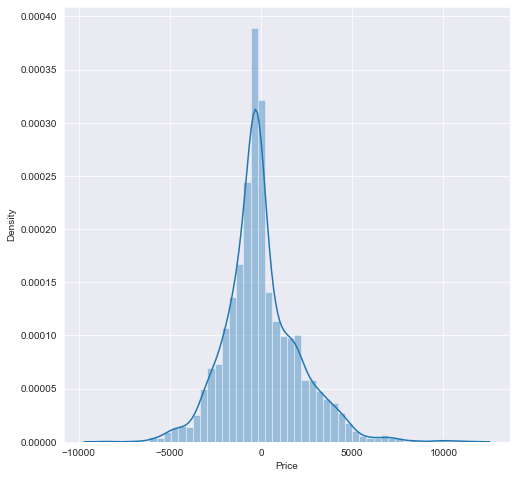

In [132]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-final_pred)
plt.show()

In [133]:
print('R2_SCORE:',r2_score(y_test,final_pred))
print('Mean_Squared_Error:',mean_squared_error(y_test,final_pred))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,final_pred)))

R2_SCORE: 0.7507831527401208
Mean_Squared_Error: 4125047.4059741865
Root Mean_Squared_Error: 2031.0212716695476


# saving 

In [135]:
import pickle

In [139]:
file = open('flight_price_predition.pkl', 'wb')

In [140]:
pickle.dump(rf, file)

In [144]:
m = open('flight_price_predition.pkl', 'rb')

In [145]:
flight = pickle.load(m)

In [147]:
prediction = flight.predict(X_test)

In [149]:
print(r2_score(y_test,prediction))

0.7507831527401208


# Loading Test Data

In [151]:
test_df = pd.read_csv("Test_set.csv")

In [152]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# EDA:

In [153]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [154]:
test_df.shape

(2671, 10)

In [155]:
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [156]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# No null vaues present in Dataset

In [157]:
#checking for unique values
test_df.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [163]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


##### Date_of_Journey is a object data type. therefore, we have to convert this datatype into timestamp

In [165]:
test_df["Journey_day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day
test_df["Journey_month"] = pd.to_datetime(test_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [166]:
#now dropping 
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [167]:
test_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


##### Similar to Date_of_Journey we can extract values from Dep_Time

In [169]:
# Extracting Hours nf minutes
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_Min"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

In [170]:
# now dropping
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [171]:
test_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,17
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,8
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,6,20,20
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,3,14,14
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,6,3,21,21
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,6,3,4,4


##### Similar to Date_of_Journey we can extract values from Arrival_Time¶

In [172]:
# Extracting Hours nf minutes
test_df["Arrival_hour"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["Arrival_Min"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour

In [173]:
# now dropping
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [174]:
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,17,4,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,6,10,10
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,19,19,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,8,21,21
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,23,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,20,20,20
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,14,16,16
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,21,4,4
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,4,19,19


In [175]:
duration = list(test_df["Duration"])

In [176]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

In [178]:
#creating 
duration_hours = []
duration_mins = []

In [179]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [180]:
# Adding duration_hours and duration_mins list to train_data dataframe
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins

In [181]:
# now dropping
test_df.drop(["Duration"], axis = 1, inplace = True)

In [183]:
test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,17,4,4,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,6,10,10,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,19,19,19,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,8,21,21,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,23,2,2,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,20,20,20,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,14,16,16,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,21,4,4,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,4,19,19,15,15


# label encoding:

In [184]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [185]:
test_df['Airline'] = le.fit_transform(test_df['Airline'])

test_df['Source'] = le.fit_transform(test_df['Source'])

test_df['Destination'] = le.fit_transform(test_df['Destination'])

In [186]:
test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
0,4,2,1,DEL → BOM → COK,1 stop,No info,6,6,17,17,4,4,10,55
1,3,3,0,CCU → MAA → BLR,1 stop,No info,12,5,6,6,10,10,4,0
2,4,2,1,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,19,19,19,23,45
3,6,2,1,DEL → BOM → COK,1 stop,No info,21,5,8,8,21,21,13,0
4,0,0,2,BLR → DEL,non-stop,No info,24,6,23,23,2,2,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,CCU → DEL → BLR,1 stop,No info,6,6,20,20,20,20,23,55
2667,3,3,0,CCU → BLR,non-stop,No info,27,3,14,14,16,16,2,35
2668,4,2,1,DEL → BOM → COK,1 stop,No info,6,3,21,21,4,4,6,35
2669,1,2,1,DEL → BOM → COK,1 stop,No info,6,3,4,4,19,19,15,15


In [187]:
test_df.corr()

,Airline,Source,Destination,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
Airline,1.000000,-0.031107,0.033630,0.000293,0.049111,0.003731,0.003731,-0.018313,-0.018313,-0.180405,-0.047461
Source,-0.031107,1.000000,-0.578296,-0.032604,0.170430,0.056065,0.056065,0.001719,0.001719,0.153565,-0.141338
Destination,0.033630,-0.578296,1.000000,-0.011200,-0.352907,-0.049023,-0.049023,-0.004945,-0.004945,-0.246831,0.071332
Journey_day,0.000293,-0.032604,-0.011200,1.000000,-0.023324,-0.023386,-0.023386,0.019613,0.019613,-0.025496,0.018353
Journey_month,0.049111,0.170430,-0.352907,-0.023324,1.000000,0.015798,0.015798,-0.000679,-0.000679,-0.016043,-0.059019
Dep_hour,0.003731,0.056065,-0.049023,-0.023386,0.015798,1.000000,1.000000,0.000147,0.000147,-0.019739,-0.022836
Dep_Min,0.003731,0.056065,-0.049023,-0.023386,0.015798,1.000000,1.000000,0.000147,0.000147,-0.019739,-0.022836
Arrival_hour,-0.018313,0.001719,-0.004945,0.019613,-0.000679,0.000147,0.000147,1.000000,1.000000,0.052277,-0.124326
Arrival_Min,-0.018313,0.001719,-0.004945,0.019613,-0.000679,0.000147,0.000147,1.000000,1.000000,0.052277,-0.124326
Duration_hours,-0.180405,0.153565,-0.246831,-0.025496,-0.016043,-0.019739,-0.019739,0.052277,0.052277,1.000000,-0.091420


In [188]:
test_df["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [189]:
#aasigning each value to Total_stops
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [191]:
#dropping unwanted columns
test_df.drop(["Route"], axis = 1, inplace = True)

test_df.drop(["Additional_Info"], axis = 1, inplace = True)

In [193]:
test_df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
0,4,2,1,1,6,6,17,17,4,4,10,55
1,3,3,0,1,12,5,6,6,10,10,4,0
2,4,2,1,1,21,5,19,19,19,19,23,45
3,6,2,1,1,21,5,8,8,21,21,13,0
4,0,0,2,0,24,6,23,23,2,2,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,20,20,20,23,55
2667,3,3,0,0,27,3,14,14,16,16,2,35
2668,4,2,1,1,6,3,21,21,4,4,6,35
2669,1,2,1,1,6,3,4,4,19,19,15,15


# Outliers:

In [195]:
df2 =test_df[['Duration_mins']].copy()

In [196]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [197]:
dropindx = test_df.index.difference(df3.index)

In [198]:
test_df.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [200]:
test_df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
0,4,2,1,1,6,6,17,17,4,4,10,55
1,3,3,0,1,12,5,6,6,10,10,4,0
2,4,2,1,1,21,5,19,19,19,19,23,45
3,6,2,1,1,21,5,8,8,21,21,13,0
4,0,0,2,0,24,6,23,23,2,2,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,20,20,20,23,55
2667,3,3,0,0,27,3,14,14,16,16,2,35
2668,4,2,1,1,6,3,21,21,4,4,6,35
2669,1,2,1,1,6,3,4,4,19,19,15,15


In [201]:
test_df.skew()

Airline           0.483882
Source           -0.424997
Destination       1.263630
Total_Stops       0.321364
Journey_day       0.199540
Journey_month    -0.403700
Dep_hour          0.093759
Dep_Min           0.093759
Arrival_hour     -0.443166
Arrival_Min      -0.443166
Duration_hours    0.884647
Duration_mins    -0.104482
dtype: float64

In [206]:
from sklearn.preprocessing import PowerTransformer

In [207]:
PT = PowerTransformer(method='yeo-johnson', standardize=True)

In [204]:
df4 = test_df[['Duration_mins']]

In [208]:
transformed= PT.fit_transform(df4)

In [209]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [210]:
transformed.index = test_df.index

In [211]:
test_df[['Duration_mins']] = transformed[['Duration_mins']]

In [215]:
dumm = pd.get_dummies(test_df[['Airline','Source','Destination','Total_Stops']],drop_first = False)

In [214]:
test_df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_Min,Duration_hours,Duration_mins
0,4,2,1,1,6,6,17,17,4,4,10,1.459539
1,3,3,0,1,12,5,6,6,10,10,4,-1.892591
2,4,2,1,1,21,5,19,19,19,19,23,0.963242
3,6,2,1,1,21,5,8,8,21,21,13,-1.892591
4,0,0,2,0,24,6,23,23,2,2,2,1.214123
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,20,20,20,23,1.459539
2667,3,3,0,0,27,3,14,14,16,16,2,0.441931
2668,4,2,1,1,6,3,21,21,4,4,6,0.441931
2669,1,2,1,1,6,3,4,4,19,19,15,-0.720251


In [217]:
best_features = scaler.fit_transform(test_df)

# Loading Model

In [218]:
m = open('flight_price_predition.pkl', 'rb')
model = pickle.load(m)

In [220]:
print(model.predict(best_features))

[10252.27745     9595.55485    10098.16519524 ...  9138.70826667
 10067.80472381  9325.45278333]


In [222]:
Prediction = pd.DataFrame({'Predictions': model.predict(best_features), 'Actual Values': y[0:2671]})
Prediction.head(10)

,Predictions,Actual Values
0,10252.277450,3897
1,9595.554850,7662
2,10098.165195,13882
3,8790.387167,6218
4,10431.154283,13302
5,11387.284091,3873
6,10082.112598,11087
7,11723.263189,22270
8,8176.090317,11087
9,11695.038106,8625


# !!!!! THANK YOU !!!!!